### Import

In [2]:
import os
import sys
import numpy as np
import pandas as pd
import imageio
import pickle
import json
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm
from keras import backend as K
from PIL import Image
from sklearn.decomposition import PCA
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses

### Fonts

In [3]:
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'Helvetica'}

### Parameters

In [4]:
image_size = 64
latent_dim = 10
vector_size = image_size * image_size

### Preprocessing Helper Function

In [5]:
def process_image(image):
    image=tf.image.per_image_standardization(image)
    image=tf.image.resize(image,(64,64))
    return image

### Get All Files

In [6]:
myfiles = []
for root, dirs, files in os.walk("../../data/celeba/pickle", topdown=False):
    for name in files:
        if '.p' in name:
            myfiles.append(os.path.join(root, name))
myfiles = np.sort(myfiles)

### Load a few of the files in for exploration

In [7]:
data = pickle.load( open(myfiles[0], "rb" ))
X = data['X']
for datafile in myfiles[1:9]:
    data = pickle.load( open(datafile, "rb"))
    X = np.vstack((X,data['X']))
y = np.zeros((X.shape[0]))
X = X / 255.0

### Divide the data

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = np.reshape(X_train,((X_train.shape[0],image_size,image_size,3)))
X_test = np.reshape(X_test,((X_test.shape[0],image_size,image_size,3)))

### Define Autoencoder Model

In [9]:
model = models.Sequential([
    layers.Flatten(),
    layers.Dense(20, activation='relu'),
    layers.Dense(12288, activation='sigmoid'),
    layers.Reshape((64, 64, 3))
])

ModuleNotFoundError: No module named 'keras.engine.base_layer_v1'

### Add Preprocessing

In [ ]:
inputs = tf.keras.Input(shape=(64, 64, 3))
x = process_image(inputs)
outputs = model(x, training=False)
model = tf.keras.Model(inputs, outputs)
model.summary()

### Optimizer

In [ ]:
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.01,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name='Adam')

### Compile Model

In [ ]:
model.compile(optimizer='adam', loss=losses.MeanSquaredError())

### Fit Model

In [ ]:
history = model.fit(X_train, X_train, verbose=1, 
                    batch_size=128, epochs=100,
                    validation_data=(X_test,X_test))

### Store

In [ ]:
model.save('../../models/autoencoder_celeba');

### Plot Loss during training

In [ ]:
plt.figure(figsize=(7,7))
plt.subplots_adjust(left=0.0,bottom=0, right=1.0, top=1, wspace=0.2, hspace=0)
plt.subplot(1,1,1);
plt.plot(history.history['loss'], lw=2,c='k', label='loss')
plt.plot(history.history['val_loss'], lw=2,c='r',label = 'validation loss')
plt.xlabel('Epoch',**csfont,fontsize=20)
plt.ylabel('Loss',**csfont,fontsize=20)
plt.yticks(np.linspace(0,0.05,11),np.round(np.linspace(0,0.05,11),2).astype(float),**csfont,fontsize=16)
plt.xticks(np.linspace(0,100,11),np.linspace(0,100,11).astype(int),**csfont,fontsize=16)
plt.grid()

### Predict

In [249]:
y_pred = model.predict(X_test)

### Reconstruct a few faces

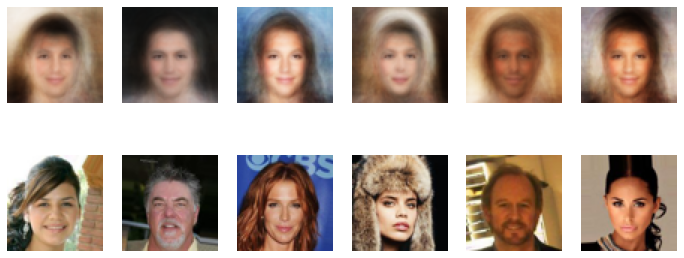

In [250]:
plt.figure(figsize=(12,5))
for i in range(6):
    randval = np.random.randint(y_pred.shape[0])
    impred = y_pred[randval,:,:,:]
    imact = X_test[randval,:,:,:]
    plt.subplot(2,6,i+1)
    plt.imshow(impred)
    plt.axis('off')
    plt.subplot(2,6,i+7)
    plt.imshow(imact)
    plt.axis('off')

In [1]:
# get_3rd_layer_output = K.function([autoencoder.layers[0].layers[0].input],
#                                   [autoencoder.layers[0].layers[2].output])

# layer_output = get_3rd_layer_output(Xtest)
print(model.layers[3].layers[2].input_shape)

get_layer_output = K.function([model.layers[3].layers[2].input],[model.layers[3].layers[3].output])
I = np.zeros((1,200))
I[0,60] = 10
V = get_layer_output(I)
plt.imshow(V[0][0,:,:,:])


# # I[:,:] = 0
# # I[0,:] = [0,10,0,0,0,0,0,0,0,0]
# # plt.subplot(1,2,1)
# # plt.imshow(Xtest[0,:,:])
# # layer_output = get_layer_output(I)
# # im = layer_output[0][0,:,:]
# # plt.subplot(1,2,2)
# # plt.imshow(im)

# # # # # layer_output[0].shape
# # # # plt.imshow(layer_output[0],aspect=0.001)

NameError: name 'model' is not defined

# 